# Bias-Variance Decomposition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso

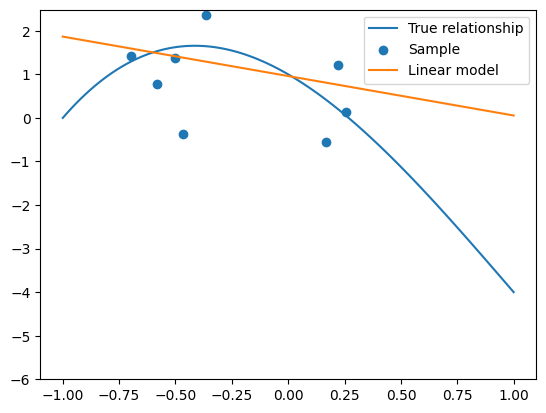

In [37]:
# True relationship: a smooth cubic function
# y = x^3 - 3x^2 - 3x + 1
x_min = -1.0
x_max = 1.0
x = np.linspace(x_min, x_max, 100)

def f(x):
    return x**3 - 3*x**2 - 3*x + 1

def draw_sample(n, x_min, x_max, noise_stddev=1.0):
    x = np.random.uniform(x_min, x_max, n)
    x.sort()
    y = f(x) + np.random.normal(0, noise_stddev, n)
    return x, y

# Draw a sample of 10 points
x_sample, y_sample = draw_sample(10, x_min, x_max)

# Fit a linear model to the sample
model = LinearRegression().fit(x_sample[:, np.newaxis], y_sample)

# Plot
y_true = f(x)
plt.plot(x, y_true, label='True relationship')
plt.scatter(x_sample, y_sample, label='Sample')
plt.plot(x, model.predict(x[:, np.newaxis]), label='Linear model')
plt.ylim((y_true * 1.5).min(), (y_true * 1.5).max())
plt.legend();

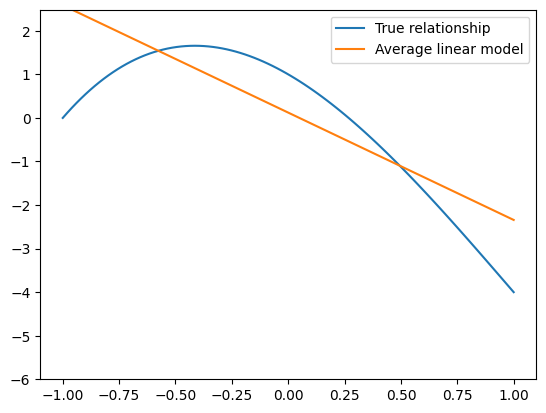

In [38]:
# Repeat that process many times
n_samples = 100
predictions = np.zeros((n_samples, len(x)))
for i in range(n_samples):
    x_sample, y_sample = draw_sample(10, x_min, x_max)
    model = LinearRegression().fit(x_sample[:, np.newaxis], y_sample)
    predictions[i] = model.predict(x[:, np.newaxis])
plt.plot(x, y_true, label='True relationship')
plt.plot(x, predictions.mean(axis=0), label='Average linear model')
plt.ylim((y_true * 1.5).min(), (y_true * 1.5).max())
plt.legend();

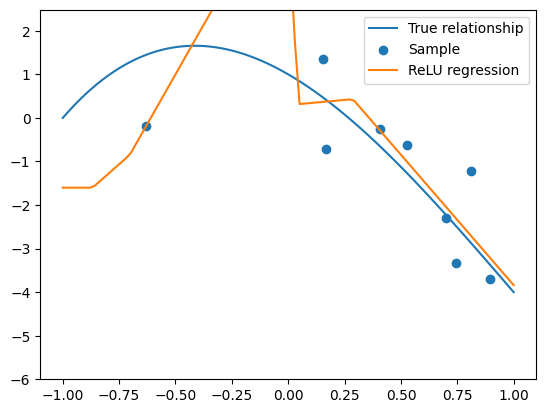

In [54]:
# ReLU regression with randomly placed hinges
n_features = 5
x_sample, y_sample = draw_sample(10, x_min, x_max)
hinge_locations = np.random.uniform(x_min, x_max, n_features)
features = np.maximum(x_sample[:, np.newaxis] - hinge_locations, 0)
features_all_x = np.maximum(x[:, np.newaxis] - hinge_locations, 0)
model = LinearRegression().fit(features, y_sample)
plt.plot(x, y_true, label='True relationship')
plt.scatter(x_sample, y_sample, label='Sample')
plt.plot(x, model.predict(features_all_x), label='ReLU regression')
plt.ylim((y_true * 1.5).min(), (y_true * 1.5).max())
plt.legend();

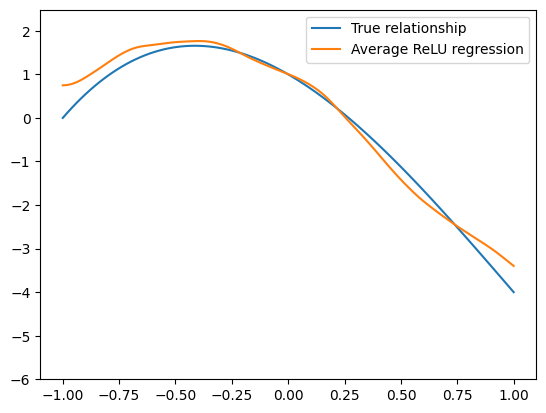

In [58]:
# Repeat that process many times
n_features = 5000
n_samples = 100
predictions = np.zeros((n_samples, len(x)))
for i in range(n_samples):
    x_sample, y_sample = draw_sample(10, x_min, x_max)
    hinge_locations = np.random.uniform(x_min, x_max, n_features)
    features = np.maximum(x_sample[:, np.newaxis] - hinge_locations, 0)
    features_all_x = np.maximum(x[:, np.newaxis] - hinge_locations, 0)
    model = Ridge(alpha=0.1).fit(features, y_sample)
    predictions[i] = model.predict(features_all_x)
plt.plot(x, y_true, label='True relationship')
plt.plot(x, predictions.mean(axis=0), label='Average ReLU regression')
plt.ylim((y_true * 1.5).min(), (y_true * 1.5).max())
plt.legend();